# What is classification problem?
Binary Classification  - Email is Spam or Not Spam ?

Multiclass Classification - Classify food items from their images. Pizza , Sushi,Sandwitch


Multilabel Classification - wikipedia article can be assigned multiple labels.

Architecture of a neural network classification model.
input shapes and output shapes of a classification model(features and labels)

### Input tensor dimenssions - [Batch size, width,height,colour channels]
### Example dimenssion for food classification - [32,224,224,3]
### Example output dimenssion for food classification - [3]. Its one per class , so totally 3 classes.


In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check out featurers
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is little hard to understand. right now lets visualize it!

In [5]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


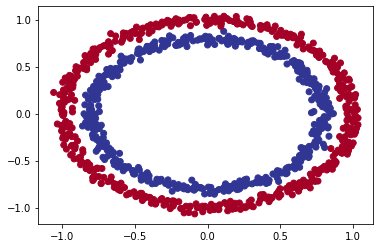

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

##Input and output shapes

In [7]:
# Check the shapes of our features and labels
print(X.shape,y.shape)

# How many samples we're working
print(len(X),len(y))

# View the first example of features and labels
print(X[5,:], y[5])

(1000, 2) (1000,)
1000 1000
[-0.47964637  0.67643477] 1


## Steps in modelling

In [8]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                               
])

# Compile the model.
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [9]:
# Let's try and improve our model by training for longer
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [10]:
# Try with more layers
# set random seed
tf.random.set_seed(42)

# create model with 2 layers
model_2 = tf.keras.Sequential([
   tf.keras.layers.Dense(1),
   tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(X,y,epochs=100,verbose=1)

# Evaluate the model
model_2.evaluate(X,y)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5010
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.4960
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.4990
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.4960
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4920
Epoch 11/

[0.6933314800262451, 0.5]

In [11]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improve our model further as model_2 is just 50% accuracy.

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense nuerons
  tf.keras.layers.Dense(10), # add 10 dense nuerons
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_3.fit(X,y,epochs=100,verbose=0)

# Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

In [13]:
import numpy as np
# To visualize model predictions, lets create function
def plot_decision_boundary(model,X,y):
  """
    Plots the decision bounday created by a model predicting on X
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min,x_max = X[:,0].min() - 0.1 ,  X[:,0].max() + 0.1
  y_min,y_max = X[:,0].min() - 0.1 ,  X[:,0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))
  
  # Create X value
  x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D arrays together
  # Make predictions
  y_pred = model.predict(x_in)
  # Check for multi-class
  if len(y_pred[0]) > 1 :
    print(" doing multi-class classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision bounday
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1], c=y, s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

doing binary classification


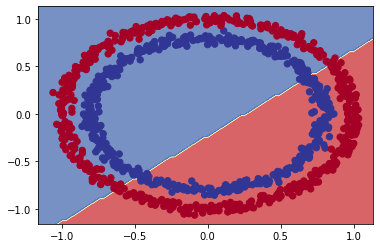

In [14]:
# Checkot the predictions our model is making
plot_decision_boundary(model_3,X=X,y=y)

In [15]:
## From above plot the model predictions are linear where as our data is non-linear(circular)
## So let's see if our model can be used for a regression problem.

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

# Split our regression data into training and test data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# we compiled our model for binary classification. we are working on regression problem.
# so recompile with loss as mae
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense nuerons
  tf.keras.layers.Dense(10), # add 10 dense nuerons
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit our model to regression data
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)



Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

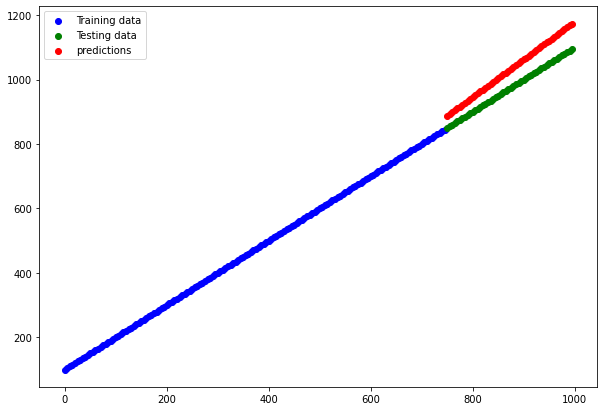

In [16]:
# Plot regression problem
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='b',label='Training data')
plt.scatter(X_reg_test,y_reg_test,c='g',label='Testing data')
plt.scatter(X_reg_test,y_reg_preds.squeeze(),c='r',label='predictions')
plt.legend()

## The missing piece : Non-linearity

In [17]:
# Set the random seed
tf.random.set_seed(42)

#1. create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

#2. compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. fit the model.
model_4.fit(X,y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/100
32/32 [=

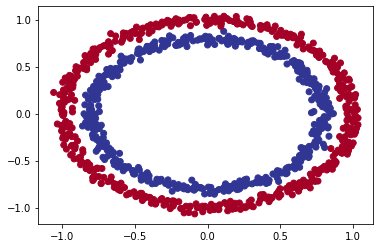

In [18]:
# Check out data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

doing binary classification


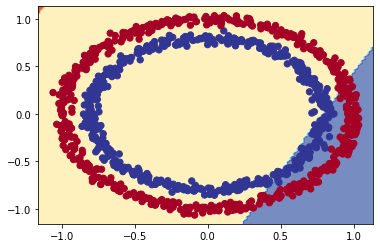

In [19]:
# Check the decision bounday of our latest models
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

### Lets try build our first neural network with non-linear activation function

In [20]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear , multi-layer neural network
model_6 = tf.keras.Sequential([
   tf.keras.layers.Dense(4,activation=tf.keras.activations.relu), # Non-linear activation=Relu
   tf.keras.layers.Dense(4,activation=tf.keras.activations.relu), # Non-linear activation=Relu 
   tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

#3. compile the model
model_6_hist=model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#4. fit the model
model_6.fit(X,y,epochs=1000,verbose=0)

#5. evaluate the model
model_6.evaluate(X,y)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 0.0124 - accuracy: 0.9960


[0.012382439337670803, 0.9959999918937683]

doing binary classification


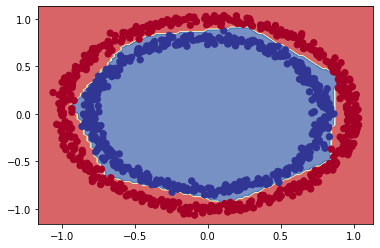

In [21]:
# How do our model predictions looks
plot_decision_boundary(model_6,X,y)

🤔 ** Questions ** What's wrong the predictions we've made? 

The combination of Linear(straight lines) and non-linear functions is the key in neural networks.

In [22]:
# Create a toy tensor
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

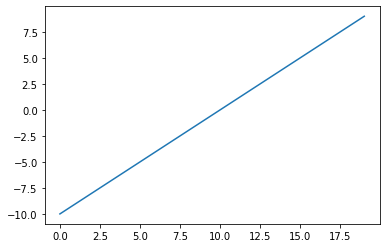

In [23]:
# Visualize our toy tensor
plt.plot(A)

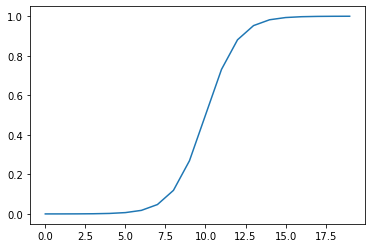

In [24]:
# Let's start by replicating sigmoid - sigmoid(x) = 1/(1+exp(-x))
def sigmoid(x):
  return 1 / (1+tf.exp(-x))

# Use the sigmoid function on toy tensor
sigmoid(A)

# Visualize
plt.plot(sigmoid(A))

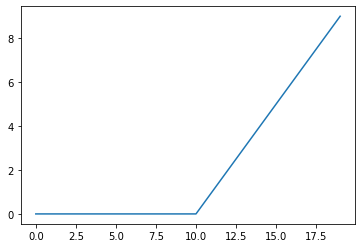

In [25]:
# Let's start replicating Relu activation function. 
def relu(x):
  return tf.maximum(0,x)

relu(A)

# Visualize
plt.plot(relu(A))

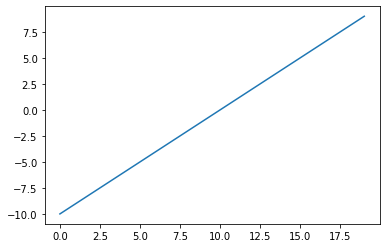

In [26]:
# Let's try replicating linear activation function
tf.keras.activations.linear(A)
# Visualize 
plt.plot(tf.keras.activations.linear(A))

In [27]:
# Any change in A with linear activation function ?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

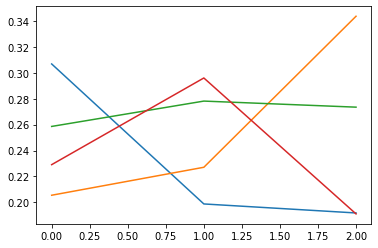

In [28]:
# Let's visualize softmax activation function
softmax_tensor=tf.keras.activations.softmax(tf.random.uniform(shape=[3,4],dtype=tf.float32),axis=-1)

plt.plot(softmax_tensor)

## Evaluating and improving our classification
So far we've been training and testing on same dataset....
however , in ML this is a sin,
so let's create training and test set.

In [29]:
# Split into train and test sets
X_train , y_train = X[:800],y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape , X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [30]:
# Let's recreate a model to fit on training data and evaluating on test data
# set random seed.
tf.random.set_seed(42)

#1. create the model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

#2. complie the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

#3. fit the model
history= model_8.fit(X_train,y_train,epochs=25,verbose=0)

#4. evaluate
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849867582321, 1.0]

doing binary classification
doing binary classification


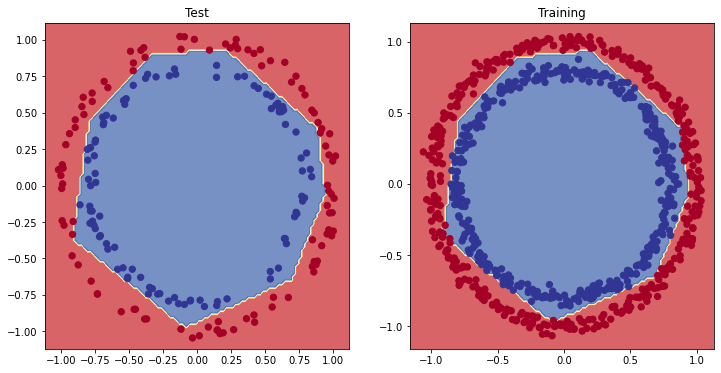

In [31]:
# Plot decision bounday for Test data,Training data
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_8,X_test,y_test)
plt.subplot(1,2,2)
plt.title("Training")
plot_decision_boundary(model_8,X_train,y_train)

## Plot the loss (or training) curves


In [32]:
# Covert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_8 Loss curves')

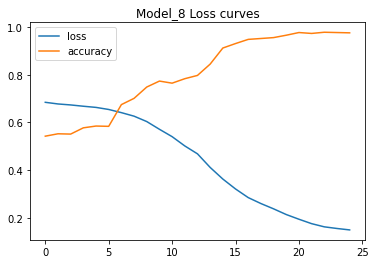

In [33]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 Loss curves")

**Note:** For many problems , the loss function going down means the model is improving(the predictions it's making are getting closre to the ground truth labels.

## Finding the best learning rate
To find the ideal learning rate(the learning rate where the loss decreases the most during
                                training) we're going to use the following steps:
* A learning rate **callback** you can think of a callback an extra piece of functionality
* Another mode
* A modified loss curves plot.

In [34]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

#Create a model(same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#Fit the model
history_9= model_9.fit(X_train,y_train,epochs=100,
                       callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

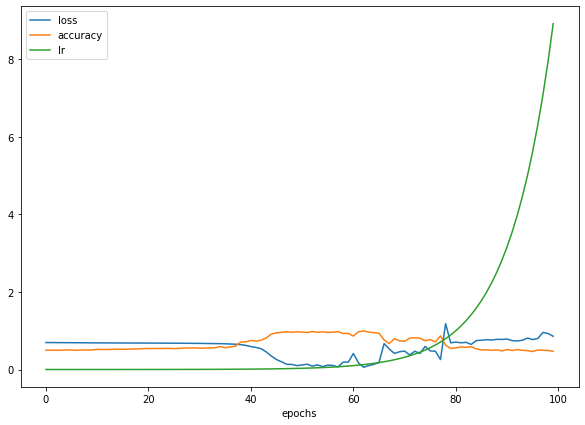

In [35]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate vs. Loss')

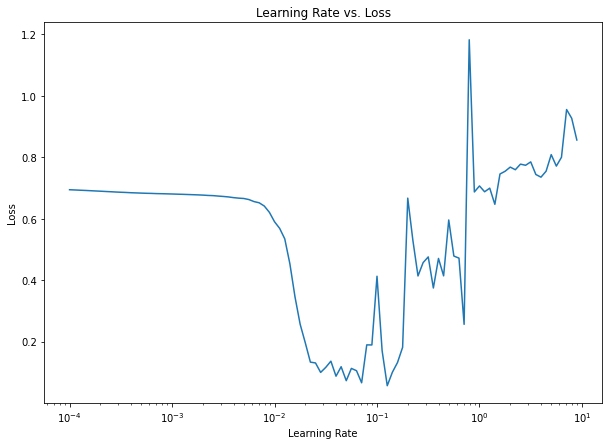

In [36]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")


In [37]:
# Examples of other typical learning rates values:
10**0, 10**-1, 10**-2,10**-3,1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [38]:
# Let's try using a higher **ideal** learning rate
# set random seed
tf.random.set_seed(42)

# Create a model
model_10 = tf.keras.Sequential([
   tf.keras.layers.Dense(4,activation="relu"),
   tf.keras.layers.Dense(4,activation="relu"),
   tf.keras.layers.Dense(1,activation="sigmoid"),
])

# compile the model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(X_train,y_train,epochs=25,verbose=0)

# Evaluate the mode_10 on the test data
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9900


[0.046285759657621384, 0.9900000095367432]

In [39]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849867582321, 1.0]

Text(0.5, 1.0, 'Model 10 Loss vs Accuracy')

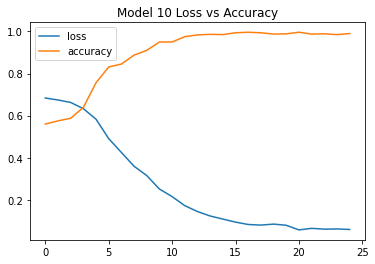

In [40]:
#history_10.history["accuracy"] ,history_10.history["loss"]
pd.DataFrame(history_10.history).plot()
plt.title("Model 10 Loss vs Accuracy")

doing binary classification
doing binary classification


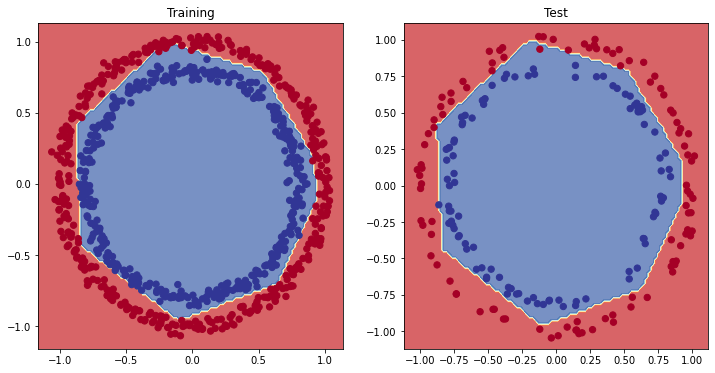

In [41]:
# Plot the decision bondaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test,y=y_test)

## More Classification evaluation methods

Alongside visualizing model results as much as possible, there are other classification evaluation methods and 
metrics you should be familiar with: 

* 1. Accuracy
* 2. Precision
* 3. Recall
* 4. F1-score
* 5. Confusion matrix
* 6. Classification report(from sklearn)

In [42]:
# Check the accuracy of our model
loss , accuracy = model_10.evaluate(X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}")

7/7 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9900
Model loss on the test set: 0.046285759657621384
Model accuracy on the test set: 99.00


###How about a confusion matrics

In [44]:
from sklearn.metrics import confusion_matrix

#Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test,y_preds)

ValueError: ignored

Oops ....looks like our predictions array has come out in **predictions probability** from the 
the standard output from the sigmoid(or softmax) activation functions

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds[:10])

In [ ]:
# (0,0) and (1,1) are correct prediction counts
# (1,0) and (0,1) are incorrect prediction counts
confusion_matrix(y_test,tf.round(y_preds))

### How about we prettify our confusion matrix?

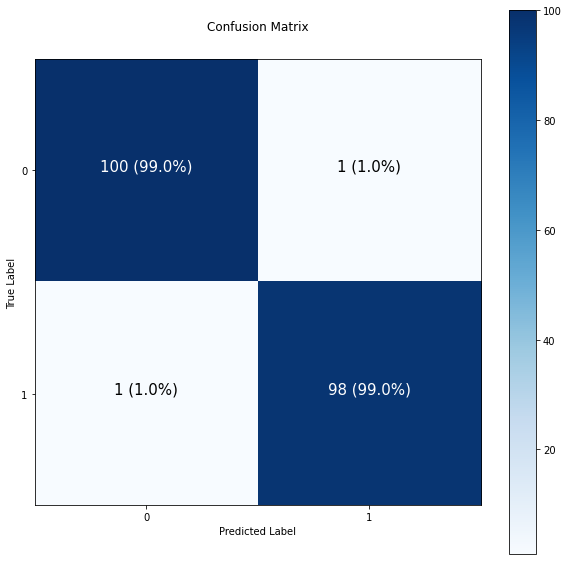

In [45]:
# Note: the confusion matrix code we're about to write is remix of sklearn's plot_confusion_matrix
import itertools
figsize = (10,10)

#Create the confusion matrix
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create Classes
classes = False
if classes:
  labels = classes
else:
   labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x=axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Set threshould for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)

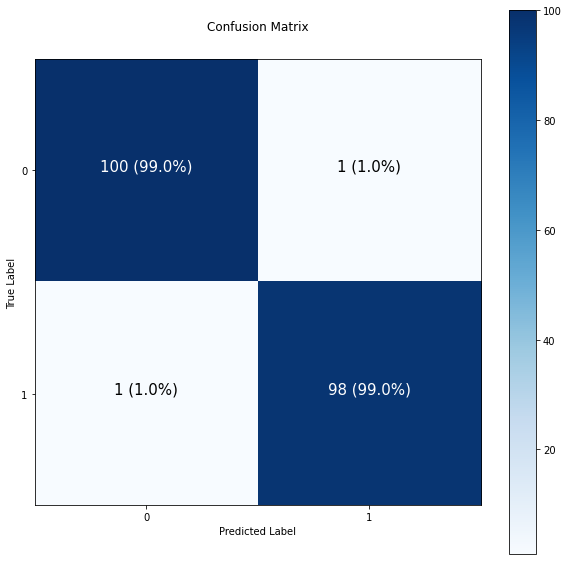

In [46]:
# Note: the confusion matrix code we're about to write is remix of sklearn's plot_confusion_matrix
import itertools

def plot_confusion_matrix(y_test,y_preds):

    figsize = (10,10)

    #Create the confusion matrix
    cm = confusion_matrix(y_test,y_preds)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm,cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Create Classes
    classes = False
    if classes:
      labels = classes
    else:
      labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
          xlabel="Predicted Label",
          ylabel="True Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)

    # Set x=axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set threshould for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i,j] > threshold else "black",
              size=15)
      
plot_confusion_matrix(y_test,tf.round(y_preds))

# Working with a larger example(Multi-class classification)

When you have more than two classes as an option , its known as multi-class classification.

* This means if you have 3 or 100 different classes, it's multi-class classification.

To practice multi-class classification , we're going to build neural network to classify fashion dataset from Fashion-MNIST.

In [47]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us.
(train_data,train_labels), (test_data,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [48]:
# Show the first training examples
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training Label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [49]:
# Check the shape of a single example
train_data[0].shape , train_labels[0].shape

((28, 28), ())

Sample Label  9


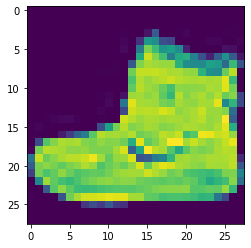

In [50]:
# Plot single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]) 
print("Sample Label ",train_labels[0])

<Figure size 432x288 with 0 Axes>

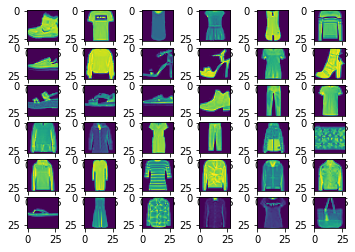

In [51]:
# Plot multiple sample images in m x n matrix format
def print_images(m,n,data):
  plt.figure()
  f, axarr =plt.subplots(m,n)
  image_count = 0
  for i in range(0,m):
    for j in range(0,n):
      axarr[i][j].imshow(data[image_count])
      image_count = image_count + 1

print_images(6,6,train_data)

In [52]:
# Create a small list so we can index onto our training labels so they're human readable.
class_names = [
"T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Bag')

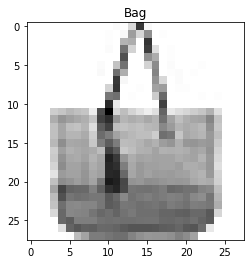

In [54]:
index_of_choice = 35
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

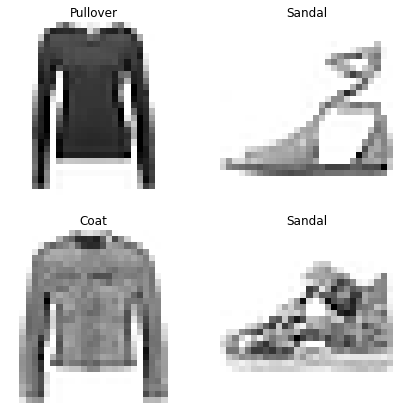

In [60]:
# Plot multiple random images of Fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

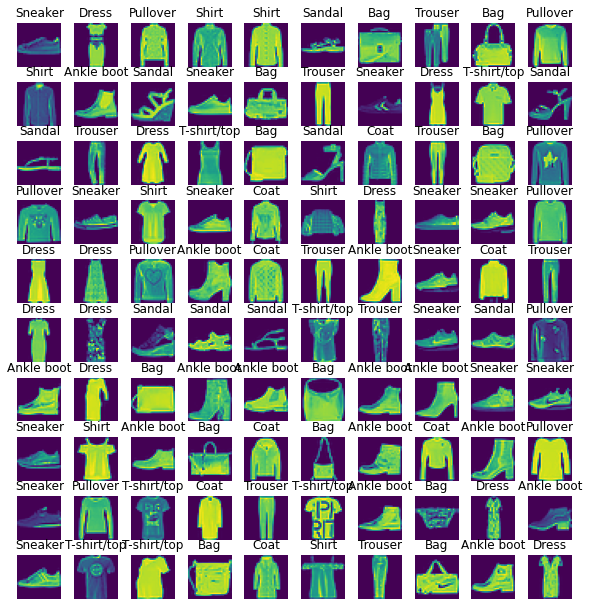

In [73]:
import random

# Print m x n random sample images in m x n matrix format
def print_images(m,n,data,class_names):
  """
    Print m x n random sample images in m x n matrix format
  """

  plt.figure(figsize=(m,n))
  
  for i in range(m*n):
      plt.subplot(m,n,i+1)
      random_index = random.choice(range(len(data)))
      plt.imshow(data[random_index])
      plt.title(class_names[train_labels[random_index]])
      plt.axis(False)
      plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

print_images(10,10,train_data,class_names)